# Foundations of Data visualisation #

In [2]:
# numpy
import numpy as np

#Pandas
import pandas as pd

In [3]:
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

In [11]:
#Initializing random generator 
np.random.seed(42)

#Days of year
days  = np.arange(1, 366)
#Random sale amount generated using normal distribution
sale  = np.random.normal(1000, 50, 365)

#Creating a dataframe using random values
df = pd.DataFrame({'Days': days, 'Sales': sale})

***Visualising dummy data generated earlier***

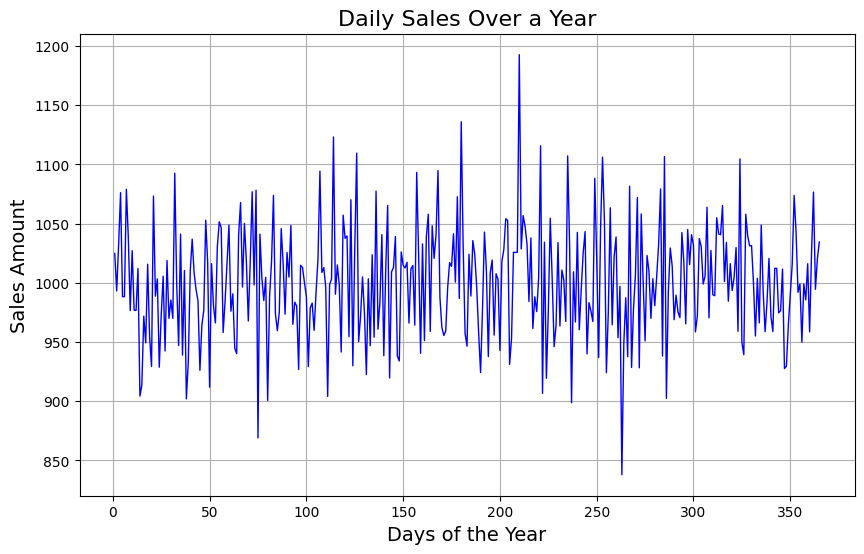

In [7]:
#Initializing figure canvas
fig, ax = plt.subplots(figsize=(10, 6))

#scripting the line plot using axes object
ax.plot(df['Days'], df['Sales'], color='blue', linewidth=1)

ax.set_title('Daily Sales Over a Year', fontsize=16)
ax.set_xlabel('Days of the Year', fontsize=14)
ax.set_ylabel('Sales Amount', fontsize=14)
ax.grid(True)

#rendering the plot
plt.show()


In [ ]:
min_sale = df[250:275].min().Sales
df[df["Sales"]==min_sale]

# From the above graph we observed that between days 250 to 275 there is a significant drop in sales and after investigating further it was found that on 263rd day lowest sales were observed which require further ivestigation.

,Days,Sales
262,263,837.936633


### Overview of Matplotlib Architecture ###

The top-level matplotlib object that contains and manages all of the elements in a given graphic is called the `Figure`. One of the core architectural tasks matplotlib must solve is implementing a framework for representing and manipulating the `Figure` that is segregated from the act of rendering the Figure to a user interface window or hardcopy.

The architecture to accomplish this is logically separated into three layers, which can be viewed as a stack. Each layer that sits above another layer knows how to talk to the layer below it, but the lower layer is not aware of the layers above it.

**The three layers from bottom to top are:**
1.  Backend
2.  Artist
3.  Scripting.

***1. Backend Layer:*** At the bottom of the stack is the backend layer, which provides concrete implementations of the abstract interface classes:

-   `FigureCanvas` encapsulates the concept of a surface to draw onto (e.g. "the paper").
-   `Renderer` does the drawing (e.g. "the paintbrush").
-   `Event` handles user inputs such as keyboard and mouse events.

***2. Artist Layer:*** Everything you see in a matplotlib Figure is an Artist instance; the title, the lines, the tick labels, the images, and so on all correspond to individual Artist instances. The base class is matplotlib.artist.Artist, which contains attributes that every Artist shares 


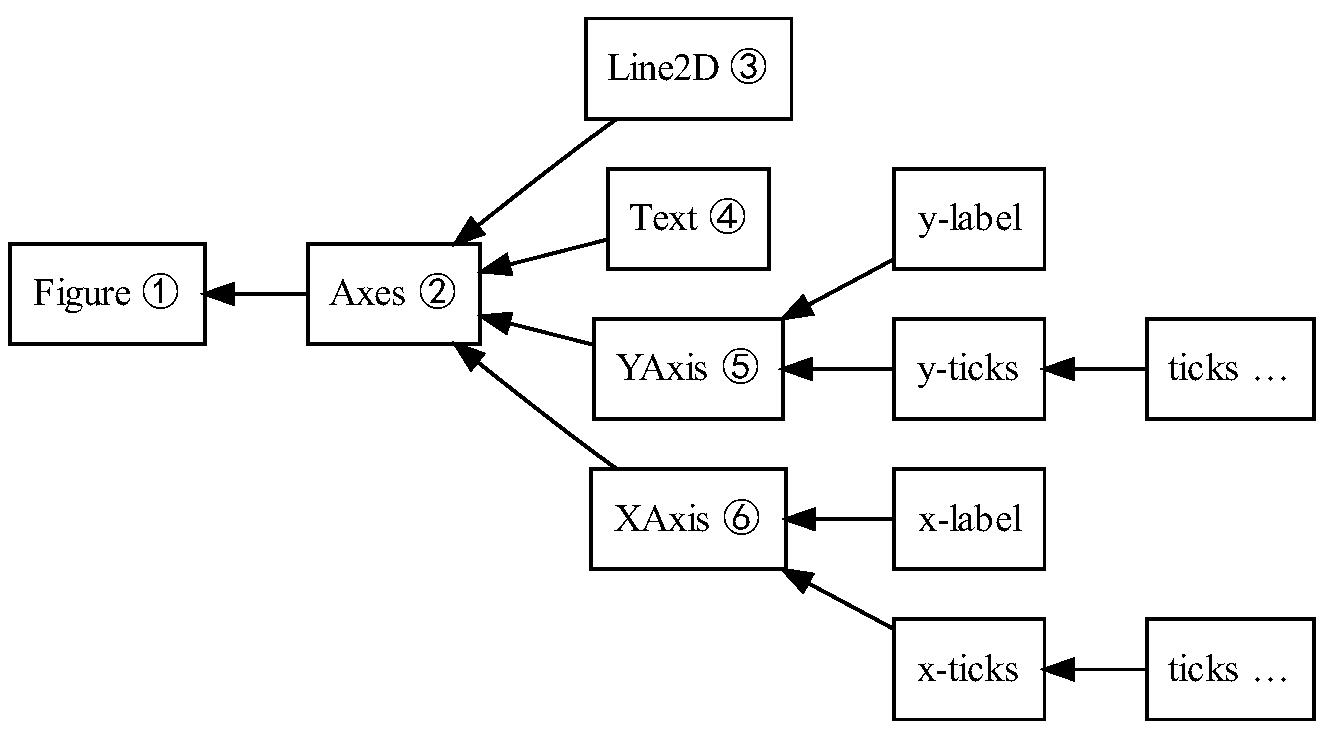


***3. Scripting Layer (Pyplot)***  `pyplot` is a stateful interface that handles much of the boilerplate for creating figures and axes and connecting them to the backend of your choice, and maintains module-level internal data structures representing the current figure and axes to which to direct plotting commands.



## Data visualisation using Matplotlib in python (Assignment Solution Part-1)

In [4]:
Path = '~/tds101/MLNOTES/test_data.csv'  # Replace with your actual file path

In [5]:
## Importing test data
test_df = pd.read_csv(Path)
test_df.head(5)

,Date,Bitcoin_Price,Hours_Studied,Test_Score,Group,Tip,Category,Magnitude
0,2021-01-31,31248.4,9,36,Non-Smoker,25,A,89.1
1,2021-02-28,32179.2,5,22,Smoker,28,B,398.9
2,2021-03-31,33503.1,3,17,Non-Smoker,30,A,814.4
3,2021-04-30,35264.6,7,40,Smoker,5,A,21.5
4,2021-05-31,36147.5,19,77,Non-Smoker,4,B,1298.6


In [5]:
test_df.describe()

,Bitcoin_Price,Hours_Studied,Test_Score,Tip,Magnitude
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,77297.413000,10.250000,41.580000,5.740000,10579.308000
std,27189.449273,5.459446,21.969759,4.366123,21055.138586
min,31248.400000,1.000000,0.000000,-1.000000,11.300000
25%,53747.725000,6.000000,24.750000,4.000000,91.350000
50%,74944.200000,11.000000,41.000000,5.000000,518.650000
75%,101274.475000,14.000000,59.250000,7.000000,9968.850000
max,124807.700000,20.000000,87.000000,30.000000,96233.300000


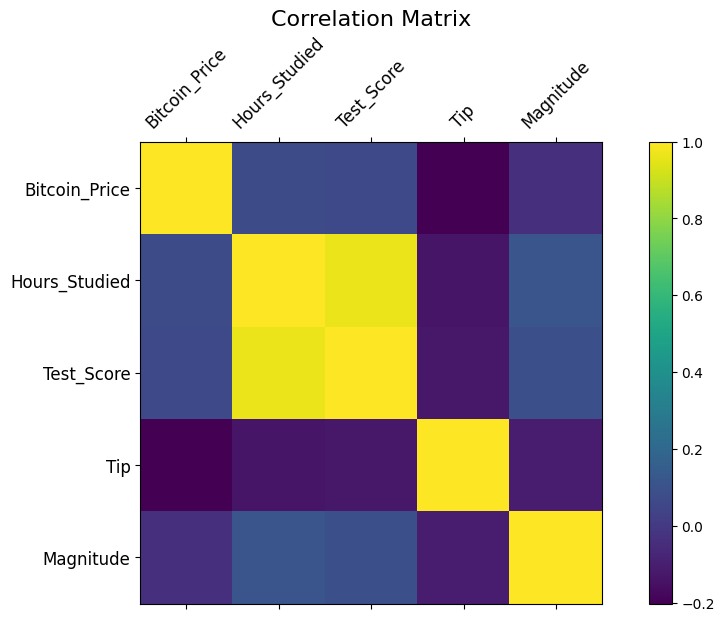

In [8]:
# Since there are multiple fields that belong to different categories so I need to perform an initial correlation analysis to understand the realtionship between different variables.
fig, ax = plt.subplots(figsize = (12, 6))
corr_matrix = test_df.select_dtypes(['number']).corr()

im = ax.matshow(corr_matrix)
ax.set_xticks(range(test_df.select_dtypes(["number"]).shape[1]), labels=test_df.select_dtypes(["number"]).columns, fontsize = 12,  rotation=45)
ax.set_yticks(range(test_df.select_dtypes(["number"]).shape[1]), labels=test_df.select_dtypes(["number"]).columns, fontsize = 12)
fig.colorbar(im, ax=ax)

plt.title('Correlation Matrix', fontsize=16)    
plt.show()

From the above correlation matrix only the following conclusion can be made that hours studied and test scores are high correlated fields but I need to view the numerical fields in conjunction with the categorical fields in order to get a much clearer picture.

In [18]:
categorical = test_df.select_dtypes(['object']).columns
categorical

Index(['Date', 'Group', 'Category'], dtype='object')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Bitcoin_Price</th>
      <th>Hours_Studied</th>
      <th>Test_Score</th>
      <th>Group</th>
      <th>Tip</th>
      <th>Category</th>
      <th>Magnitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>31248.4</td>
      <td>9</td>
      <td>36</td>
      <td>Non-Smoker</td>
      <td>25</td>
      <td>A</td>
      <td>89.1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32179.2</td>
      <td>5</td>
      <td>22</td>
      <td>Smoker</td>
      <td>28</td>
      <td>B</td>
      <td>398.9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>33503.1</td>
      <td>3</td>
      <td>17</td>
      <td>Non-Smoker</td>
      <td>30</td>
      <td>A</td>
      <td>814.4</td>
    </tr>
    <tr>
      <th>3</th>
      <td>35264.6</td>
      <td>7</td>
      <td>40</td>
      <td>Smoker</td>
      <td>5</td>
      <td>A</td>
      <td>21.5</td>
    </tr>
    <tr>
      <th>4</th>
      <td>36147.5</td>
      <td>19</td>
      <td>77</td>
      <td>Non-Smoker</td>
      <td>4</td>
      <td>B</td>
      <td>1298.6</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>95</th>
      <td>120643.8</td>
      <td>6</td>
      <td>27</td>
      <td>Non-Smoker</td>
      <td>5</td>
      <td>A</td>
      <td>13761.7</td>
    </tr>
    <tr>
      <th>96</th>
      <td>121791.9</td>
      <td>19</td>
      <td>69</td>
      <td>Non-Smoker</td>
      <td>5</td>
      <td>C</td>
      <td>3609.5</td>
    </tr>
    <tr>
      <th>97</th>
      <td>122922.4</td>
      <td>8</td>
      <td>47</td>
      <td>Non-Smoker</td>
      <td>7</td>
      <td>A</td>
      <td>16602.7</td>
    </tr>
    <tr>
      <th>98</th>
      <td>123925.0</td>
      <td>18</td>
      <td>70</td>
      <td>Non-Smoker</td>
      <td>7</td>
      <td>C</td>
      <td>40983.0</td>
    </tr>
    <tr>
      <th>99</th>
      <td>124807.7</td>
      <td>13</td>
      <td>54</td>
      <td>Non-Smoker</td>
      <td>7</td>
      <td>A</td>
      <td>2944.8</td>
    </tr>
  </tbody>
</table>
<p>100 rows × 7 columns</p>
</div>

In [ ]:
#from the above correlation matrix i can conclude that a clear relationship exists between Hours studied and score achieved which can be further analysed.
#1. Histogram between Hours studied and test_scores

#Looking at the dataset it would be prudent to break it into two seperate datasets:
#1. [Hours studied, test_scores, Group, Tip]
#   1.a Frequency distribution of Hours studied and test_scores
#   1.b Boxplot between Hours studied and test_scores
#   1.c Scatter plot between Hours studied and test_scores
#   1.d Bar plot between Hours_studies, groups and test_scores
#   1.e Distribution plot between Tips and Groups
#   1.f Distribution plot between test_scores and tips
#   1.g Distribution of Group and hours studied
#   1.h Distribution of Group and test_scores
#2. [Bitcoin_price, Date, Category, Magnitude]
#   2.a Line plot between Date and Bitcoin_price
#   2.b Scatter plot between Date and Bitcoin_price
#   2.c Distribution between Date, bitcoin price and category
#   2.d Distribution between Date,magnitude and category
#   2.e Boxplot between Date, magnitude and bitcoin_price
#   2.f Bar plot between Date, category, magnitude and bitcoin_price


distributed = test_df[['Hours_Studied', 'Test_Score', 'Group', 'Tip']]
time_series = test_df[['Date','Bitcoin_Price', 'Category', 'Magnitude']]

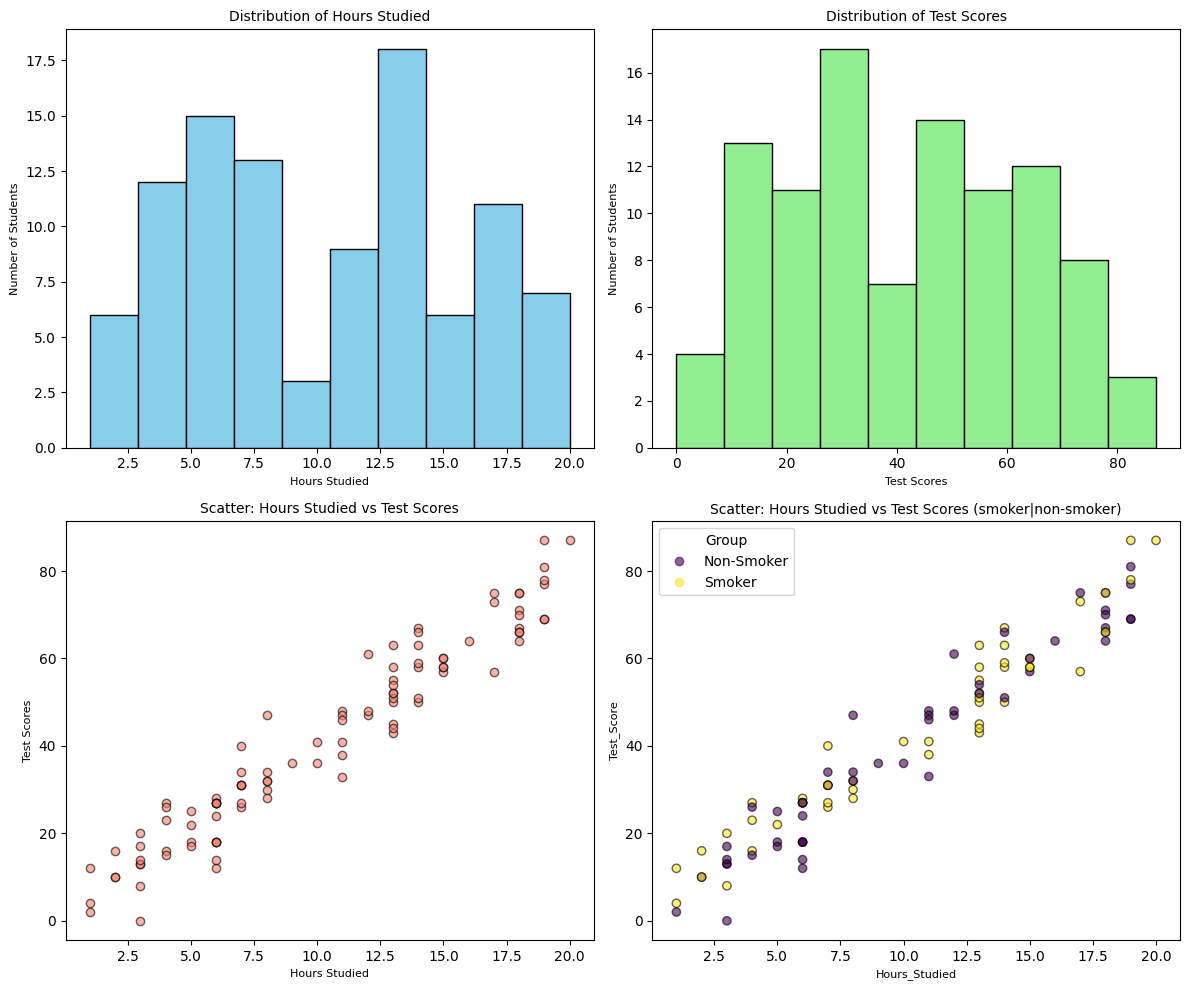

In [ ]:
#Initializing a multi-plot canvas
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

# Plotting histogram for Hours_Studied
ax[0, 0].hist(distributed['Hours_Studied'], bins = 10, color = 'skyblue', edgecolor = 'black')
ax[0, 0].set_title('Distribution of Hours Studied', fontsize = 10)
ax[0, 0].set_xlabel('Hours Studied', fontsize = 8)
ax[0, 0].set_ylabel('Number of Students', fontsize = 8)

# Plotting histogram for Test_Score
ax[0, 1].hist(distributed['Test_Score'], bins = 10, color = 'lightgreen', edgecolor = 'black')
ax[0, 1].set_title('Distribution of Test Scores', fontsize = 10)
ax[0, 1].set_xlabel('Test Scores', fontsize = 8)
ax[0, 1].set_ylabel('Number of Students', fontsize = 8)

# Plotting scatter plot for Hours_Studied and Test_Score
ax[1, 0].scatter(distributed['Hours_Studied'], distributed['Test_Score'], color = 'salmon', edgecolor = 'black', alpha = 0.6)
ax[1, 0].set_title('Scatter: Hours Studied vs Test Scores', fontsize = 10)
ax[1, 0].set_xlabel('Hours Studied', fontsize = 8)
ax[1, 0].set_ylabel('Test Scores', fontsize = 8)

# Checking distribution of Study hours vs test scores over smokers and non-smokers
group, labels = pd.factorize(distributed['Group'])

sc = ax[1, 1].scatter(distributed['Hours_Studied'], distributed['Test_Score'], c = group, edgecolor = 'black', alpha = 0.6)
ax[1,1].set_title('Scatter: Hours Studied vs Test Scores (smoker|non-smoker)', fontsize = 10)
ax[1,1].set_xlabel('Hours_Studied', fontsize = 8)
ax[1,1].set_ylabel('Test_Score', fontsize = 8)

handles, _ = sc.legend_elements(prop = 'colors')
ax[1, 1].legend(handles, labels, title='Group')

# Disrbution of studying hours for smokers and non smokers

plt.tight_layout()
plt.show()